# To Explore Supervised Machine Learning

## Setting up Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## Data Acquisition

In [2]:
data=pd.read_csv('http://bit.ly/w-data')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Shape of data
data.shape

(25, 2)

### Data Observation:

From above data, there are two variables Hours and Scores. Independent varibales is Hours and Target variable is the Percentage of Scores.
Since our target variable is Numerical, we can use Regression algorithm.

## Simple Linear Regression

Linear regression with a single independent variable or feature is called **Simple Linear Regression**. The output of linear regression is an estimate of the outcome variable (aka target).

Here we are going to predict the percentage of scores of each candidate based on the number of Hours studied

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Chcking Null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

As there were no null values its good to proceed further steps.

### Correlation:

In [6]:
cor=data.corr()
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is highly positive Correlation between Hours and Scores. Therefore, Hours variable is strongly affecting Scores variable.

## Data Visualization

Let us plot a Scatterplot between Hours and Scores using Matplotlib Library. 
So that we can find the relationship between them.

Text(0.5, 1.0, 'Scatter Plot between Hours and Scores')

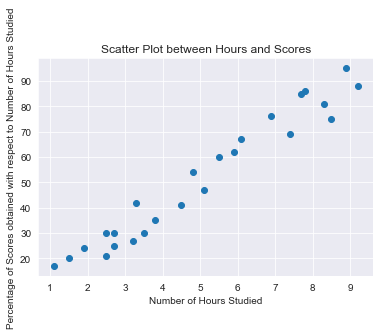

In [7]:
plt.scatter(x=data['Hours'], y=data['Scores'])
plt.xlabel('Number of Hours Studied')
plt.ylabel('Percentage of Scores obtained with respect to Number of Hours Studied')
plt.title('Scatter Plot between Hours and Scores')

#### From Scatter plot, we observed that there is linear relationship between Hours and Scores.

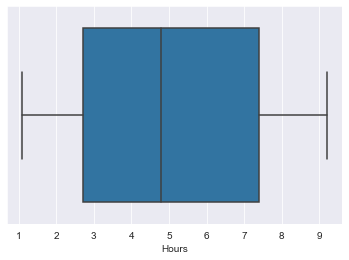

In [8]:
sns.boxplot(data['Hours'])

#### From Boxplot, we observed that there are no outliers in Hours Variable..

## Data Bifurication

Data Bifurication is process of dividing the dataaset into two parts namely train and test data.

In [9]:
X=data.iloc[:,:-1]
y=data.iloc[:,1]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=101)

## Model Building

Building Regression Algorithm on train data

In [11]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [12]:
m=model.coef_
c=model.intercept_
print('Regression Coefficient = {}'.format(m))
print('Regression Intercept = {}'.format(c))

Regression Coefficient = [9.73330705]
Regression Intercept = 2.5121292983200902


## Plotting Regression Line

We know that equation of regression line is "$\hat{y}$ = m*X + c". 

Here m is slope,

c is the intercept of line and

$\hat{y}$ is the predicted value.

So we find Regression line equation by substituting respective values in linear equation formula.

Text(0.5, 1.0, 'Regression Line')

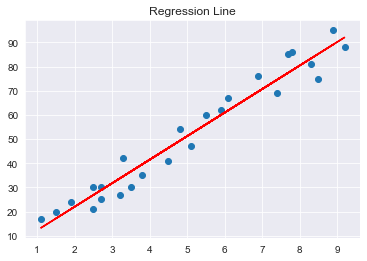

In [13]:
regression_line= m*X + c

plt.scatter(X,y)
plt.plot(X, regression_line, color='red')
plt.title('Regression Line')

## Predicting Test Data

In [14]:
pred=model.predict(X_test)
pred

array([26.84539693, 77.45859361, 39.4986961 , 74.53860149, 56.04531809])

In [15]:
predicted=pd.DataFrame({'Hours':X_test.values.flatten(),'y_test_score':y_test, 'y_pred_score':pred})
predicted

,Hours,y_test_score,y_pred_score
16,2.5,30,26.845397
10,7.7,85,77.458594
22,3.8,35,39.498696
19,7.4,69,74.538601
7,5.5,60,56.045318


## Model Evaluation

Evaluating the model means finding the performance of the model. We use a metric called Mean Squared Error value to know how our model is performing on data. There are other metrics also like Mean Absolute Error and Root Mean Squared Error.

In [16]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
mse=mean_squared_error(y_test, pred)
mae=mean_absolute_error(y_test,pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,pred)

print('Root Mean Squared Error = {}'.format(rmse))
print('Mean Absolute Error = {}'.format(mae))
print('Mean Squared Error = {}'.format(mse))
print('R-Squared = {}'.format(r2))

Root Mean Squared Error = 5.164846812544614
Mean Absolute Error = 4.937597792467706
Mean Squared Error = 26.675642597052256
R-Squared = 0.9377551740781869


Since our R-Squared value is closer to 1, then our regression model is best fit model for data

## Predicting New test data

In [17]:
hours=np.array(9.25).reshape(1,1)
score= model.predict(hours)
print('Number of Hours = {}'.format(hours))
print('Predicted Score = {}'.format(score))

Number of Hours = [[9.25]]
Predicted Score = [92.54521954]
